<a href="https://colab.research.google.com/github/namvux1404/Anomalies-detection---Vector-workshop/blob/BLYY123-patch-1/testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the GDN code from gitHub

In [1]:
!git clone https://github.com/d-ailin/GDN.git

Cloning into 'GDN'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 54 (delta 10), reused 6 (delta 6), pack-reused 27
Receiving objects: 100% (54/54), 473.31 KiB | 1.90 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Update python file due to Pytorch-geometric lib version issue from our folder

In [2]:
!git clone https://github.com/namvux1404/Anomalies-detection---Vector-workshop.git

Cloning into 'Anomalies-detection---Vector-workshop'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 102 (delta 20), reused 8 (delta 8), pack-reused 72
Receiving objects: 100% (102/102), 568.72 KiB | 9.80 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [3]:
#modify graph_layer.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/graph_layer.py /content/GDN/models/graph_layer.py

#modify main.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/main.py /content/GDN/main.py

#modify evaluate.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/evaluate.py /content/GDN/evaluate.py

Install necessary libs for GDN

In [4]:
import os
os.chdir('./GDN/')

In [5]:
import torch
## check PyTorch version
print(torch.__version__)

2.0.1+cu118


In [6]:
!pip install torch_geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=692efb7038062f2992e3f2ea668fea90da9620b863a9be93d8d7b2c83cf0c867
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 42.6 MB/s eta 0:00:00


Install Kaleido lib for plotly fig saving

In [7]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00


# Explore the training and testing set

In [8]:
import pandas as pd
import plotly.express as px
import os

## define the folder to save figs
if not os.path.exists("images"):
  os.mkdir("images")

In [9]:
## read training set and plot the time-series data for four sensors
df_train = pd.read_csv('./data/msl/train.csv',sep=',')
fig_train = px.line(df_train, x=list(df_train.columns)[0], y= list(df_train.columns)[1:5])
fig_train.show()
fig_train.write_image("images/train_explore.png")

Load test set

In [10]:
df_test= pd.read_csv('./data/msl/test.csv',sep=',')

M-6 point anonymous

In [11]:
## attack labesl for each sensor is obtained from here
## https://github.com/khundman/telemanom/blob/master/labeled_anomalies.csv

## M-6 is point anonymous, anomalies are highlighted with blue circles
anonymous_sequence = [1850, 2030]

fig_m6 = px.line(df_test, x=list(df_test.columns)[0], y= list(df_test.columns)[1:2])
num_row = df_test['M-6'].count()
fig_m6.add_scatter(x=list(range(anonymous_sequence[0], min(anonymous_sequence[1], num_row)+1)),
                   y=df_test[(df_test['timestamp']>=anonymous_sequence[0])&(df_test['timestamp']<=anonymous_sequence[1])]['M-6'].tolist(),
                   mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')
fig_m6.show()
fig_m6.write_image("images/test_explore_M6.png")

M-2 contextual anonymous

In [12]:
## M-2 is contextual anonymous

anonymous_sequence = [1110, 2250]

fig_m2 = px.line(df_test, x=list(df_test.columns)[0], y= list(df_test.columns)[3:4])
num_row = df_test['M-2'].count()
fig_m2.add_scatter(x=list(range(anonymous_sequence[0], min(anonymous_sequence[1], num_row)+1)),
                   y=df_test[(df_test['timestamp']>=anonymous_sequence[0])&(df_test['timestamp']<=anonymous_sequence[1])]['M-2'].tolist(),
                   mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')
fig_m2.show()
fig_m2.write_image("images/test_explore_M2.png")

S-2 point anonymous

In [13]:
## S-2 is point anonymous
anonymous_sequence = [900, 910]

fig_s2= px.line(df_test, x=list(df_test.columns)[0], y= list(df_test.columns)[4:5])
num_row = df_test['S-2'].count()
fig_s2.add_scatter(x=list(range(anonymous_sequence[0], min(anonymous_sequence[1], num_row)+1)),
                   y=df_test[(df_test['timestamp']>=anonymous_sequence[0])&(df_test['timestamp']<=anonymous_sequence[1])]['S-2'].tolist(),
                   mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')
fig_s2.show()
fig_s2.write_image("images/test_explore_S6.png")

# Run the training examples

In [76]:
!bash run.sh 0 msl 100

/content/GDN/models/GDN.py:161: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  gated_i = torch.arange(0, node_num).T.unsqueeze(1).repeat(1, topk_num).flatten().to(device).unsqueeze(0)
epoch (0 / 100) (Loss:0.39852446, ACU_loss:15.54245380)
epoch (1 / 100) (Loss:0.31364948, ACU_loss:12.23232982)
epoch (2 / 100) (Loss:0.24776553, ACU_loss:9.66285568)
epoch (3 / 100) (Loss:0.20279148, ACU_loss:7.90886785)
epoch (4 / 100) (Loss:0.17178227, ACU_loss:6.69950852)
epoch (5 / 100) (Loss:0.15515087, ACU_loss:6.05088396)
epoch (6 / 100) (Loss:0.13915348, ACU_loss:5.42698558)
epoch (7 / 100) (Loss:0.12904593, ACU_loss:5.03279124)
epoch (8 / 100) (Loss:0.11873866, ACU_loss:4.63080765)
ep

# Show the saved embedding figure

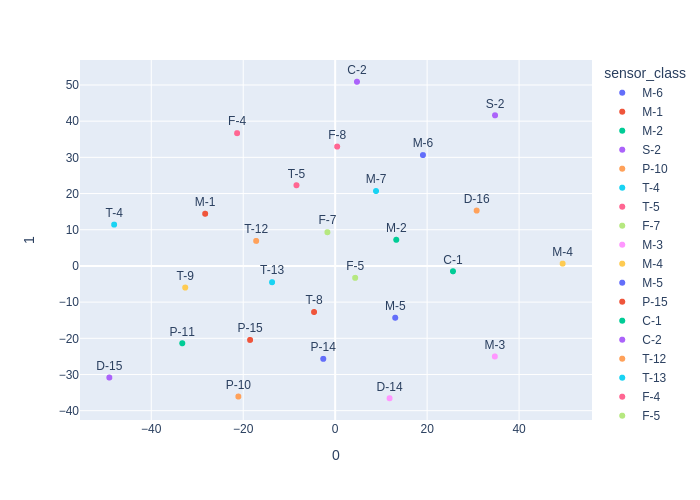

In [77]:
from PIL import Image
im = Image.open("images/test_embedding.png")
im

# Visualize the prediction results

In [78]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### load the predictions for each timestamp
path = '/content/Anomalies-detection---Vector-workshop/data/pred_labels.csv'
df = pd.read_csv(path)
df = df.rename(columns={"Unnamed: 0": "timestamp"})
df = df.set_index('timestamp')
#fig = px.line(df, x='timestamp', y= 'pred_label', markers=True)
#fig.show()

In [79]:
### compare the prediction and ground labels
cols = df.columns
ncols = len(cols)

# subplot setup
fig = make_subplots(rows=ncols, cols=1, shared_xaxes=True, vertical_spacing=0.03)

for i, col in enumerate(cols, start=1):
    fig.add_trace(go.Scatter(x=df[col].index, y=df[col].values, name=col), row=i, col=1)

fig.update_layout(title_text="Ground true label and predicted label")
fig.show()

Compare the predictions for sensors

In [84]:
path = '/content/Anomalies-detection---Vector-workshop/data/pred_sensor.csv'
df_pred = pd.read_csv(path)
df_pred = df_pred.rename(columns={"Unnamed: 0": "timestamp"})
df_pred = df_pred.set_index('timestamp')
df_pred

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
timestamp,,,,,,,,,,,,,,,,,,,,,
0,-0.002936,0.376670,0.135837,0.002095,0.500011,0.536667,0.017101,0.119896,0.820218,0.857131,...,0.099231,0.022319,0.638643,0.290203,0.074567,0.612880,0.625500,0.082049,0.027806,0.046253
1,-0.002592,0.370117,0.136223,0.002346,0.498813,0.533798,0.017496,0.115618,0.821008,0.857663,...,0.099431,0.022699,0.631541,0.280206,0.075474,0.587759,0.396814,0.051712,0.028236,0.026380
2,-0.002305,0.388305,0.136527,0.002589,0.499087,0.513594,0.017798,0.126363,0.821852,0.857940,...,0.099572,0.022919,0.603464,0.294134,0.076239,0.614483,0.710374,0.052503,0.028570,0.040130
3,-0.001736,0.378814,0.137166,0.003276,0.499593,0.515835,0.018469,0.120683,0.823001,0.858229,...,0.100116,0.023608,0.613149,0.267907,0.077767,0.609701,0.723557,0.052926,0.029169,0.040419
4,-0.001491,0.372379,0.137309,0.003439,0.498967,0.525752,0.018741,0.134590,0.823521,0.858354,...,0.100097,0.023821,0.572203,0.277459,0.078269,0.592096,0.605091,0.058603,0.029255,0.052799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-8.744761,19.285820,0.503238,269.071533,0.838612,0.586218,0.497293,0.608356,0.410838,0.634138,...,0.099928,0.500143,0.726871,0.285685,0.394775,0.662320,0.666763,0.273951,0.502759,0.033483
2040,-8.744719,19.283684,0.503278,269.070099,0.842444,0.611227,0.497368,0.537825,0.468451,0.661268,...,0.100032,0.500221,0.767868,0.268099,0.394770,0.650533,0.749001,0.250304,0.502706,0.043725
2041,-8.744696,19.282722,0.257119,269.070343,0.832708,0.650642,0.128202,0.389211,0.416524,0.667169,...,0.100274,0.104249,0.760538,0.272326,0.394788,0.629945,0.483974,0.271642,0.164333,0.042579


In [90]:
path = '/content/Anomalies-detection---Vector-workshop/data/label_sensor.csv'
df_label = pd.read_csv(path)
df_label = df_label.rename(columns={"Unnamed: 0": "timestamp"})
df_label = df_label.set_index('timestamp')
df_label

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
timestamp,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.523971,0.242650,0.0,0.538462,1.0,0.0,0.053571,0.999971,1.000000,...,0.100914,0.0,0.819984,-5.988564,0.000000,0.883398,0.000000,0.000000,0.002058,0.000000
1,0.000000,0.523971,0.242650,0.0,0.564103,1.0,0.0,0.107143,0.999971,1.000000,...,0.101127,0.0,0.819984,-5.670902,0.000000,0.912596,0.000000,0.000000,0.002058,0.000000
2,0.000000,0.523971,0.242650,0.0,0.512821,1.0,0.0,0.053571,0.999971,1.000000,...,0.101354,0.0,0.819984,-6.306226,0.000000,0.682415,0.834882,0.000000,0.002058,0.000000
3,0.000000,0.523971,0.242650,0.0,0.564103,1.0,0.0,0.053571,0.999971,1.000000,...,0.101439,0.0,0.819984,-5.670902,0.000000,0.528300,0.834882,0.000000,0.002058,0.041667
4,0.000000,0.523971,0.242650,0.0,0.589744,1.0,0.0,0.250000,0.999971,1.000000,...,0.101553,0.0,0.819984,-5.353240,0.000000,0.525560,0.834882,0.000000,0.002058,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,130.891891,0.372644,1.149189,1.0,0.589744,1.0,0.0,1.000000,0.449225,0.594396,...,0.078599,0.0,0.500000,-5.353240,0.492754,0.651800,1.024071,0.537485,0.001723,0.000000
2040,130.891891,0.523990,0.242644,1.0,0.538462,1.0,0.0,1.000000,0.235447,0.594396,...,0.079664,0.0,0.500000,-5.988564,0.492754,0.634886,0.000000,0.543744,0.001723,0.000000
2041,130.891891,0.523990,0.242644,1.0,0.461538,1.0,0.0,0.910714,0.040388,0.594396,...,0.081708,0.0,0.500000,-6.941550,0.492754,0.589530,0.000000,0.543744,0.001723,0.000000


In [96]:
df_s2 = pd.merge(df_pred.iloc[:,2], df_label.iloc[:,2], on='timestamp')
cols = df_s2.columns
ncols = len(cols)

# subplot setup
fig = make_subplots(rows=ncols, cols=1, shared_xaxes=True, vertical_spacing=0.03)

for i, col in enumerate(cols, start=1):
    fig.add_trace(go.Scatter(x=df_s2[col].index, y=df_s2[col].values, name=col), row=i, col=1)

fig.update_layout(title_text="Ground true label and predicted label")
fig.show()